main goal was to train and test a YOLOv8 object detection model to detect Fire & Smoke in images

combination of supervised learning (trained on labelled images where objects are annotated with bounding boxes) , CV (image analysis and object detect), DL (uses cnn)

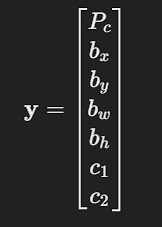


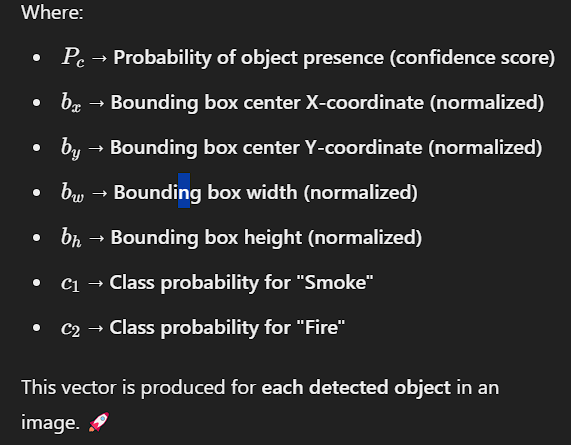



the above is for one image likewise many images have each suhc corresponding vector for each object in image for the bounding box which makes the y_train whereas x_train consists of images for SINGLE OBJECTS ONLY

1️⃣ Image Splitting:


2️⃣ Feature Extraction with CNN:


3️⃣ Bounding Box Prediction:


4️⃣ Class Prediction:


5️⃣ Non-Maximum Suppression (NMS):


if a large image, Yolo divides the image in grid of cells.
it checks each cell to predict object inside it. if centre falls within that certain cell, the cell has that object.

eg. Each cell at position (i,j) will predict objects only if the object’s center is in that cell & output set of predictions related to possible objects.

The preidction includes: bounding box cordinates, confidence score class prob.

If a dog’s nose is in one square and its tail in another, only the square containing the dog's center will detect it.

Uses CNN then: (extracts single feature for one object and multiple feat for multiple objects in the image)

CNN’s filters first detect edges (like outlines of the dog).
Deeper layers detect shapes (dog’s face, eyes).
Even deeper layers detect objects (a full dog).

**Non-Maximum Suppression (NMS):**

Sort all bounding boxes by confidence score (C).

Pick the box with the highest confidence and remove all boxes with high overlap (measured by IoU).

Repeat until only the best boxes remain.

Suppresses duplicate boxes per object type, ensuring each object is detected only once for multi objects in image.

IoU= area of overlap/union

If IoU> threshold (e.g., 0.5), we remove the lower-confidence box.

One class label per detected object whereas for multiclass,	Each bounding box has its own separate class label (e.g., car, person, dog).

In [ ]:
!pip install ultralytics
from google.colab import drive
import os
import cv2
from ultralytics import YOLO

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 921.5/921.5 kB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 71.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 58.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 45.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 14.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [ ]:
from google.colab import files
files.upload()  # Upload your kaggle.json here


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"rishikashinde636","key":"0fed42bcec32a20c18b229ad2f365f7f"}'}

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle datasets list -s "Smoke-Fire-Detection-YOLO"


ref                                                            title                                             size  lastUpdated          downloadCount  voteCount  usabilityRating  
-------------------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
sayedgamal99/smoke-fire-detection-yolo                         Smoke-Fire-Detection-YOLO                          3GB  2025-01-27 12:37:37            455         31  1.0              
dataclusterlabs/fire-and-smoke-dataset                         Fire and Smoke Dataset                            85MB  2023-04-22 03:03:15           9237         92  0.875            
roscoekerby/firesmoke-detection-yolo-v9                        Fire/Smoke Detection YOLO v9                     924MB  2024-09-16 22:18:05            479          5  1.0              
ahemateja19bec1025/wildfiresmokedatasetyolo                    WildFire-Smoke-Da

In [ ]:
import pandas as pd
from io import BytesIO
import zipfile

# Fetch dataset without downloading
dataset_path = "sayedgamal99/smoke-fire-detection-yolo"
!kaggle datasets download -d {dataset_path} --unzip --quiet -p /content/

# Check files
!ls /content/


Dataset URL: https://www.kaggle.com/datasets/sayedgamal99/smoke-fire-detection-yolo
License(s): CC0-1.0
data  data.yaml  sample_data


In [ ]:
import os

dataset_path = "/content/data"

# List dataset files
for root, dirs, files in os.walk(dataset_path):
    print(root, len(files), "files")


/content/data 0 files
/content/data/test 0 files
/content/data/test/images 4306 files
/content/data/test/labels 4306 files
/content/data/val 0 files
/content/data/val/images 3099 files
/content/data/val/labels 3099 files
/content/data/train 0 files
/content/data/train/images 14122 files
/content/data/train/labels 14122 files


In [ ]:
yaml_content = """train: /content/data/train/images
val: /content/data/val/images

nc: 2
names: ['Smoke', 'Fire']
"""

# Write the correct YAML file
with open("/content/data/data.yaml", "w") as f:
    f.write(yaml_content)

print("Updated data.yaml successfully!")


Updated data.yaml successfully!


In [ ]:
from ultralytics import YOLO

# Load YOLOv8 model
model = YOLO("yolov8n.yaml")  # You can change to "yolov8s.yaml" or "yolov8m.yaml" for better accuracy

# Train the model
model.train(data="/content/data/data.yaml", epochs=7, imgsz=640)


Ultralytics 8.3.78 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=/content/data/data.yaml, epochs=7, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=T

100%|██████████| 755k/755k [00:00<00:00, 25.6MB/s]


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 93.3MB/s]


AMP: checks passed ✅


train: Scanning /content/data/train/labels... 14122 images, 6458 backgrounds, 0 corrupt: 100%|██████████| 14122/14122 [00:05<00:00, 2588.36it/s]

train: WARNING ⚠️ /content/data/train/images/WEB02521.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /content/data/train/images/WEB06626.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /content/data/train/images/WEB07199.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /content/data/train/images/WEB07271.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /content/data/train/images/WEB07278.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /content/data/train/images/WEB07297.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /content/data/train/images/WEB07305.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /content/data/train/images/WEB07312.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /content/data/train/images/WEB07534.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /content/data/train/images/WEB07538.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /content/data/train/images/WEB07540.jpg: corrupt JPEG restored and saved

train: New cache created: /content/data/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/data/val/labels... 3099 images, 1375 backgrounds, 0 corrupt: 100%|██████████| 3099/3099 [00:01<00:00, 1679.97it/s]

val: WARNING ⚠️ /content/data/val/images/WEB07535.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/data/val/images/WEB07536.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/data/val/images/WEB07539.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/data/val/images/WEB07542.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/data/val/images/WEB07561.jpg: corrupt JPEG restored and saved
val: New cache created: /content/data/val/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 7 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/7      2.07G      2.942      3.894      3.267         22        640: 100%|██████████| 883/883 [04:20<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:25<00:00,  3.76it/s]


                   all       3099       3932       0.18      0.238      0.111     0.0352

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/7      2.05G        2.2      2.626      2.247         20        640: 100%|██████████| 883/883 [04:18<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:22<00:00,  4.22it/s]


                   all       3099       3932      0.334      0.278      0.241     0.0999

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/7      2.05G      2.016      2.355      2.033         30        640: 100%|██████████| 883/883 [04:11<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:23<00:00,  4.14it/s]


                   all       3099       3932      0.342      0.301      0.258      0.108

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/7      2.06G      1.917      2.201      1.927         37        640: 100%|██████████| 883/883 [04:12<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:23<00:00,  4.11it/s]


                   all       3099       3932      0.449      0.385       0.36      0.159

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/7      2.04G       1.82      2.024      1.827         22        640: 100%|██████████| 883/883 [04:11<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:23<00:00,  4.14it/s]

                   all       3099       3932      0.523      0.411      0.427      0.202



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        6/7      2.04G      1.771       1.95       1.78         34        640: 100%|██████████| 883/883 [04:13<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:23<00:00,  4.13it/s]


                   all       3099       3932      0.531      0.459      0.468      0.222

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        7/7      2.05G      1.699      1.842      1.733         13        640: 100%|██████████| 883/883 [04:10<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:23<00:00,  4.21it/s]

                   all       3099       3932      0.593      0.489      0.531       0.26



7 epochs completed in 0.543 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.78 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8n summary (fused): 72 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:24<00:00,  3.95it/s]


                   all       3099       3932      0.593      0.489      0.531       0.26
                 Smoke       1550       1756      0.609      0.518      0.553      0.277
                  Fire        879       2176      0.577      0.459      0.509      0.243
Speed: 0.2ms preprocess, 1.6ms inference, 0.0ms loss, 1.9ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7daee2ec7950>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

in the last epoch 7/7 (in everything Lower is better.)

**training used 2.05gb of GPU memory** which is low and good.

**box_loss 1.699**	Measures how well the bounding boxes match ground truth.

**cls_loss 1.842**	Measures classification error (Fire, Smoke, etc.).

**dfl_loss 1.733**	"Distribution Focal Loss" – improves bounding box regression.

**Instances 13**	The number of detected objects per batch.

**Size 640**	The input image size (640×640 pixels).

**883/883 [04:10]	883** batches were processed in 4 minutes 10 seconds.

**3.53it/s**	Speed: 3.53 iterations (batches) per second.


---




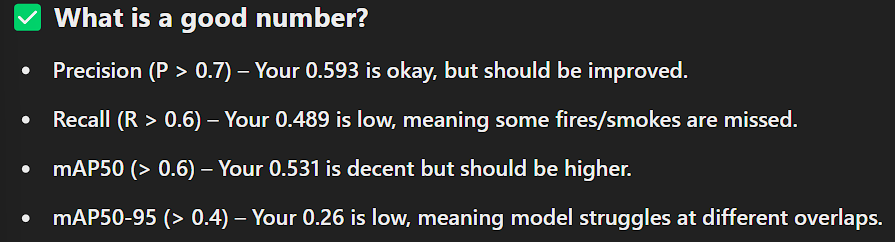

FOR VALIDATION PERFORMANCE

for epoch 7/7 (Everything higher better)

**Images 3099**	The validation dataset has 3,099 images.

**Instances 3932**	There are 3,932 objects (fire/smoke) in total.

**Box P 59.3% Precision:** How many detections were correct.

**R 48.9% Recall:** How well the model finds all objects.

**mAP50 = 53.1%** Mean Average Precision IoU (main accuracy measure).

**mAP50-95 = 0.26**	 across IoUs (50-95%) – This tests robustness at different overlaps.



In [ ]:
import os

test_images_path = "/content/data/test/images"

# List first 5 test images
test_images = os.listdir(test_images_path)[:5]

print("Sample test images:", test_images)


Sample test images: ['AoF07224.jpg', 'AoF06840.jpg', 'WEB11428.jpg', 'WEB11023.jpg', 'AoF08091.jpg']



image 1/1 /content/data/test/images/AoF07224.jpg: 384x640 (no detections), 73.6ms
Speed: 2.8ms preprocess, 73.6ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict


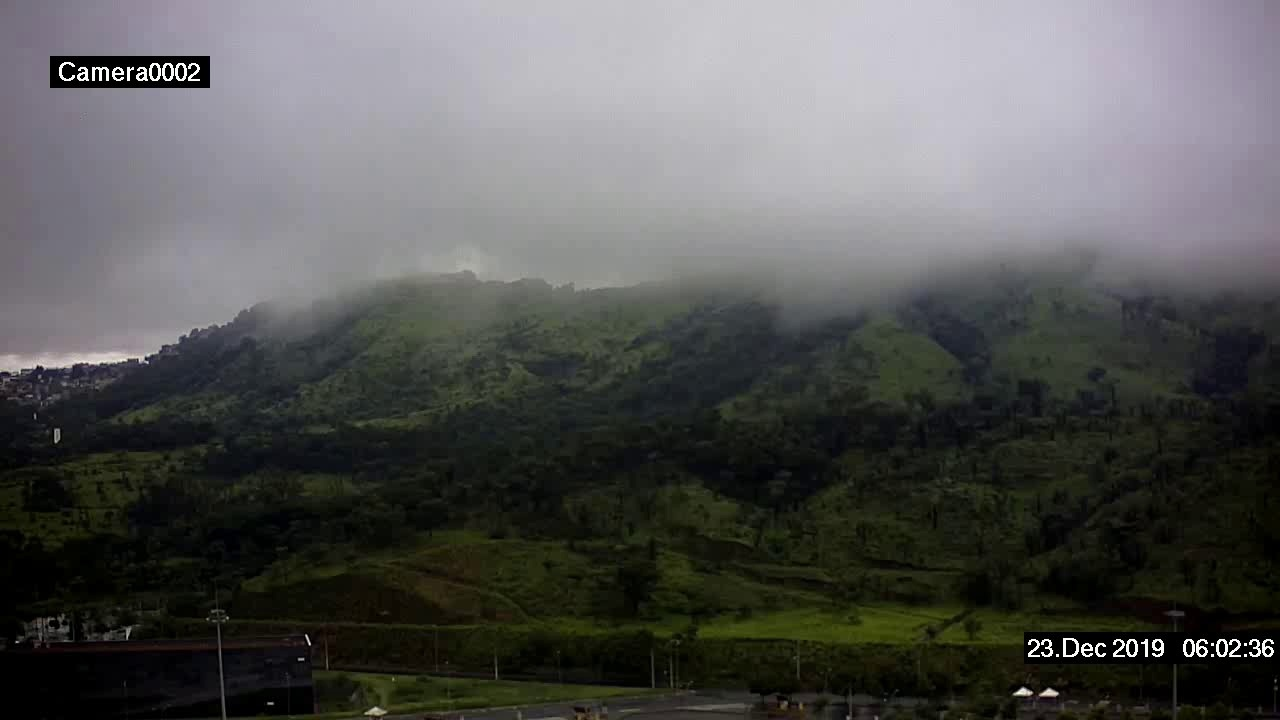

In [ ]:
# Select an actual image from the test set
test_image = "/content/data/test/images/AoF07224.jpg"  # Change to any image from the list

# Run inference
results = model(test_image, save=True)

# Show results
from IPython.display import Image
Image(filename="/content/runs/detect/predict/AoF07224.jpg")  # Adjust filename if needed


1️⃣ Anchor Boxes for Better Multi-Object Detection:

Objects come in different shapes and sizes (e.g., a bus is long, while a person is tall).
Instead of predicting any random bounding box, YOLO uses predefined anchor boxes (prior shapes).
Each grid cell predicts adjustments to these anchors rather than raw boxes.

📌 Why?


Improves detection for objects of different sizes.
Helps the model generalize better instead of learning random box shapes.

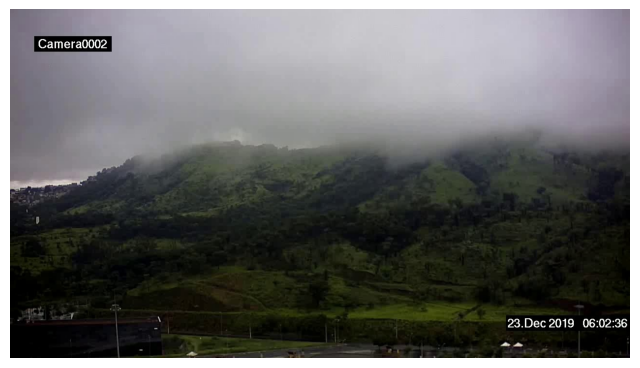

In [ ]:
import matplotlib.pyplot as plt
import cv2

# Load the predicted image
predicted_image_path = "/content/runs/detect/predict/AoF07224.jpg"  # Adjust filename if needed
img = cv2.imread(predicted_image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for correct colors

# Show image
plt.figure(figsize=(8, 6))
plt.imshow(img)
plt.axis("off")  # Hide axis
plt.show()


Small objects (e.g., birds, traffic lights) may not always be detected if the grid is too coarse.
YOLO uses multi-scale feature maps (detecting small, medium, and large objects separately).

📌 Example:
A small bird in the sky might not be detected if YOLO only looks at large-scale features. By using different levels of detail, it improves small object detection.



In [ ]:
# Run inference on the entire test dataset
results = model("/content/data/test/images", save=True)

# Results will be saved in /content/runs/detect/predict/
print("Predictions saved in /content/runs/detect/predict/")




WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

image 1/4306 /content/data/test/images/AoF06723.jpg: 384x640 (no detections), 28.4ms
image 2/4306 /content/data/test/images/AoF06724.jpg: 352x640 (no detections), 56.7ms
image 3/4306 /content/data/test/images/AoF06725.jpg: 384x640 (no detections), 17.0ms
image 4/4306 /content/data/test/images/AoF06726.jpg: 384x640 (no detections), 6.8ms
image 5/4306 /content/data/test/images/AoF06727.jpg: 384x640 (no detections), 6.3ms
image 6/4306 /content/data/test/i

KeyboardInterrupt: 

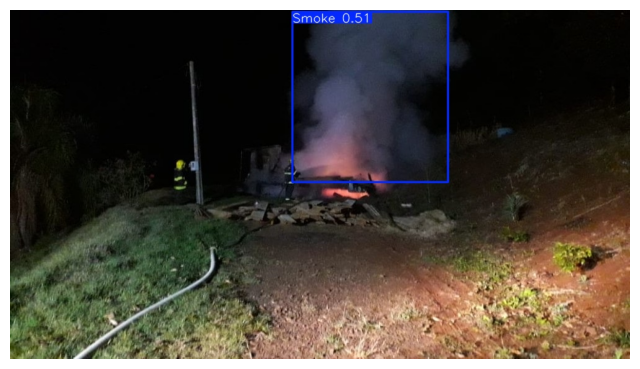

In [ ]:
import matplotlib.pyplot as plt
import cv2

# Pick an image from predictions folder
predicted_image = "/content/runs/detect/predict/WEB11403.jpg"  # Change filename if needed

# Load and display image
img = cv2.imread(predicted_image)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

plt.figure(figsize=(8, 6))
plt.imshow(img)
plt.axis("off")  # Hide axis
plt.show()


YOLO is fast but might miss some objects compared to two-stage detectors like Faster R-CNN.

YOLO is powerful because it predicts everything in a single forward pass (bounding boxes + class labels). However, for tiny objects or highly overlapping objects, two-stage detectors (like Faster R-CNN) might still be slightly better.



---

**Loss Functions in Object Detection**

🔹 Box Loss (Localization Loss) → Measures how well the predicted bounding box matches the actual object.


Uses IoU-based losses (like GIoU, DIoU, CIoU) instead of MSE.


🔹 Class Loss (Classification Loss) → Measures how well the model predicts the correct class (Fire, Smoke, etc.).


Uses Cross-Entropy or Focal Loss (not MSE) because it's a classification problem.


🔹 DFL (Distribution Focal Loss) → Makes bounding box predictions smoother and more precise.


Assigns a probability distribution to coordinates instead of just fixed numbers.

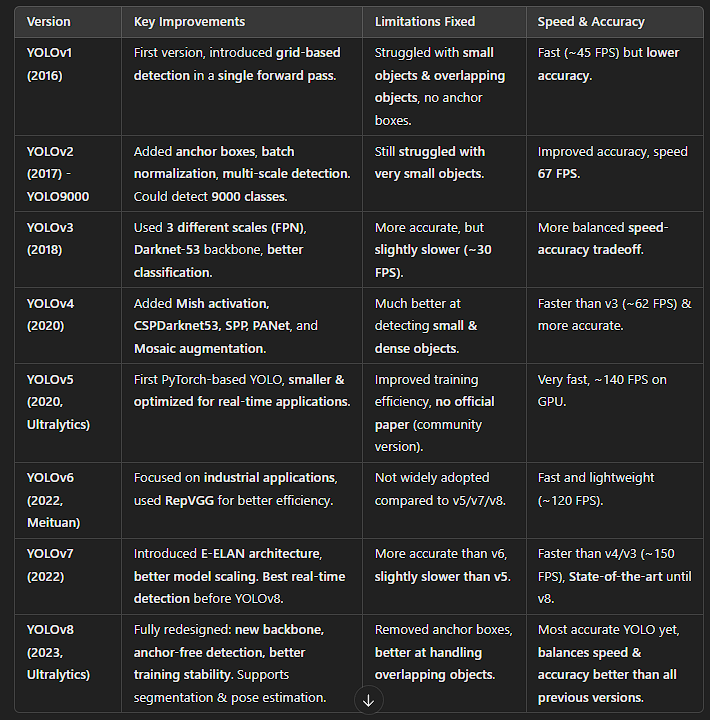

### **1️⃣ Why AUC-ROC is NOT Used in Object Detection?**  
❌ **AUC-ROC is Non-Differentiable** → We can’t compute gradients for backpropagation.  
   - Deep learning models need differentiable loss functions to update weights.  
   - AUC-ROC involves ranking predictions, which is **not a continuous function** → **can’t be optimized directly**.  

❌ **AUC-ROC is Only for Classification** → Object detection needs both **classification + localization**.  
   - AUC-ROC **does not measure bounding box accuracy**.  
   - A model can have **high AUC but still have misplaced boxes**.  

❌ **AUC-ROC Ignores Overlapping Boxes** → It **doesn’t penalize bad box placements**, unlike IoU-based losses.  

✅ **That’s why object detection uses losses like IoU-based loss, Focal Loss, and DFL instead of AUC-ROC!**  

---

### **2️⃣ Loss Functions in Object Detection (All Are Differentiable!)**  

🔹 **Box Loss (IoU-based Loss: CIoU, DIoU, GIoU)**  
   - Measures **how well the predicted bounding box aligns with the actual box**.  
   - Differentiable → Can optimize directly using gradients.  

🔹 **Class Loss (Focal Loss / Cross-Entropy Loss)**  
   - Measures **how well the object is classified** (Fire, Smoke, etc.).  
   - Differentiable → Model can adjust weights to improve classification.  

🔹 **DFL (Distribution Focal Loss)**  
   - Improves **bounding box precision** by treating coordinates as a probability distribution.  
   - Differentiable → Helps refine box predictions smoothly.  
